# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!curl.exe --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat
!curl.exe --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11244  100 11244    0     0  49835      0 --:--:-- --:--:-- --:--:-- 49973
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2844  100  2844    0     0  19455      0 --:--:-- --:--:-- --:--:-- 19613


In [2]:
# Take a peek at the datasets
!type train.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
1	0	1	1	1	0	0	0	1	1	1	0	1	1
0	1	1	0	1	0	1	1	1	1	1	1	1	1
0	0	1	1	0	0	1	0	0	1	1	1	1	0
1	0	1	1	0	0	1	1	0	1	0	0	1	1
0	0	1	1	0	0	0	0	1	0	1	1	1	0
1	0	0	0	0	0	1	0	1	1	0	1	1	0
0	1	1	1	1	1	0	0	1	0	1	0	1	1
1	0	0	0	1	0	1	1	1	1	1	1	1	0
1	0	0	0	0	1	1	0	1	1	1	1	1	0
1	0	0	1	0	1	0	1	1	0	0	1	1	0
0	0	1	1	0	1	1	0	0	0	0	1	1	0
1	1	1	0	0	1	1	1	1	1	0	1	1	1
0	1	1	1	1	1	0	0	0	1	0	1	1	0
0	0	1	1	0	1	0	1	0	1	1	1	1	0
1	0	0	1	0	1	1	1	1	0	0	1	1	0
0	0	1	0	0	0	1	0	0	0	0	0	1	0
1	0	1	0	0	0	1	1	0	0	0	1	1	0
1	0	0	0	0	1	0	0	0	1	0	1	1	0
1	0	0	0	1	1	1	0	0	1	0	1	1	0
1	0	0	0	0	0	1	1	1	1	1	0	1	0
0	0	1	1	0	1	0	1	0	0	1	0	1	0
0	1	1	0	0	0	1	1	1	1	0	1	1	0
0	0	0	0	1	1	1	1	0	0	0	0	1	0
0	1	1	0	1	1	1	1	0	0	0	1	1	0
0	1	0	1	0	0	0	1	0	0	0	1	1	0
1	0	

In [3]:
!type test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0
1	0	1	1	1	1	1	0	0	0	0	0	1	0
1	0	0	0	1	0	0	1	1	0	1	1	1	0
0	0	1	0	0	1	1	0	0	0	0	1	1	0
0	1	0	1	1	1	0	0	0	0	0	1	1	0
0	1	0	0	0	1	1	1	0	1	1	1	1	0
1	1	1	0	1	0	0	1	0	1	1	0	1	1
1	0	0	1	0	0	1	1	0	0	1	1	1	0
0	0	0	1	0	1	1	0	1	1	1	1	1	0
1	0	1	0	1	1	0	0	0	1	0	0	1	0
0	1	1	0	1	0	1	0	1	1	1	0	1	1
0	1	0	0	1	1	1	1	1	1	0	0	1	0
1	1	0	1	0	1	1	0	1	0	0	0	1	0
1	0	1	1	0	1	0	0	0	0	1	1	1	1
1	0	1	1	1	1	0	1	1	0	1	0	1	1
1	0	0	1	0	0	0	1	0	1	0	1	1	1
1	1	0	1	1	0	1	1	0	0	1	0	1	0
0	0	0	0	1	1	1	0	0	1	0	1	1	0
1	1	1	0	0	0	1	0	0	0	1	1	1	0
1	0	1	0	0	1	0	0	0	0	1	1	1	0
1	0	1	1	1	1	0	0	0	0	1	1	1	0
0	1	0	0	1	1	1	0	1	1	0	1	1	1
0	1	1	1	0	0	1	0	1	1	1	0	1	1
1	0	0	0	0	0	0	1	1	1	1	0	1	1
1	0	1	1	0	1	1	0	0	1	0	1	1	0
1	1	1	0	1	1	0	1	1	0	1	0	1	1
0	1	0

### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [4]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    dot_product = 0
    
    for i in range(len(array1)):
        dot_product += (array1[i] * array2[i])
    return dot_product 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output_func(weight, instance):
    #TODO: return the output of the model
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    if dot_product(weights, instance) >= 0.5:
        return 1
    else:
        return 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    # Initializing the weights to 0 / setting the initial weights to 0. 
    # For each input attribute there will be a weight which here we are initilaizing to 0. These weights will be modified upon training.
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # in_value step is calculating the sum of product of weights for the input attributes and the weights.
            # Output step calculating the final value of output after passing the dot product through the sigmoid activation function.
            # error is calculating the difference between the actual value and the predicted value.
            # If there is no difference between the predicted value and the actual value then the weights will not be adjusted in the next iteration.
            # Otherwise, the weights will be adjusted to minimize the error.
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            # These steps are adjusting the weights. The weights will only be adjusted if there is error in the prediction.
            # Otherwise, the algorithm goes to the next iteration without adjusting any weights.
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [5]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the following code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




We have to calculate the sum of product of weights before passing it through the activation fucntion. This is how a perceptron works. It first calculates the dot product, then passes that output into an activation function like sigmoid or relu and then calculates the error and then finally adjusts the weights to minimize the error.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [6]:
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]     
lr = [0.005, 0.01, 0.05]

for i in range(len(tr_percent)):
    for j in range(len(lr)):
        for k in range(len(num_epochs)):
            instances_training = instances_tr[:int(len(instances_tr) * tr_percent[i] / 100)]
            
            weights = train_perceptron(instances_tr, lr[j], num_epochs[k])
            
            accuracy = get_accuracy(weights, instances_te)
            
            print(f"#tr: {len(instances_training):3}, epochs: {num_epochs[k]:3}, learning rate: {lr[j]:.3f}; "
              f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr:  20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr:  20, epochs

In [7]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

tr = []
epocs = []
learning_rate = []
accuracies = []

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
          size =  round(len(instances_tr)*tr_size/100)
          pre_instances = instances_tr[0:size]
          weights = train_perceptron(pre_instances, lr, epochs)
          accuracy = get_accuracy(weights, instances_te)
        print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
        
        tr.append(len(pre_instances))
        epocs.append(epochs)
        learning_rate.append(lr)
        accuracies.append(accuracy)

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 70.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



In the below graph we can see that the larger dataset size produced higher accuracy.

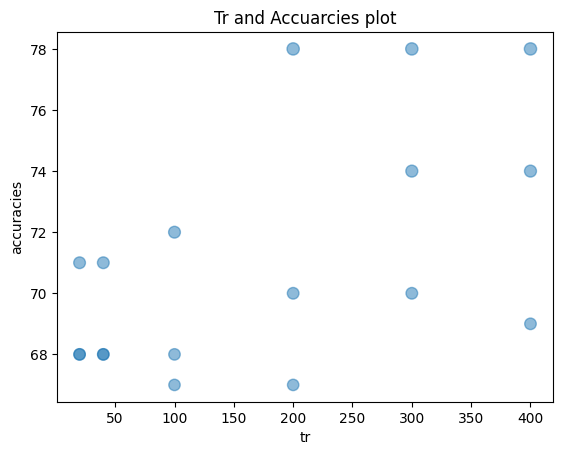

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter = ax.scatter(tr, accuracies, s=accuracies, alpha=0.5)
ax.set_xlabel('tr')
ax.set_ylabel('accuracies')
ax.set_title('Tr and Accuarcies plot')

plt.show()

In the below graph we can see that changing learning rate has an effect on the overall accuracy

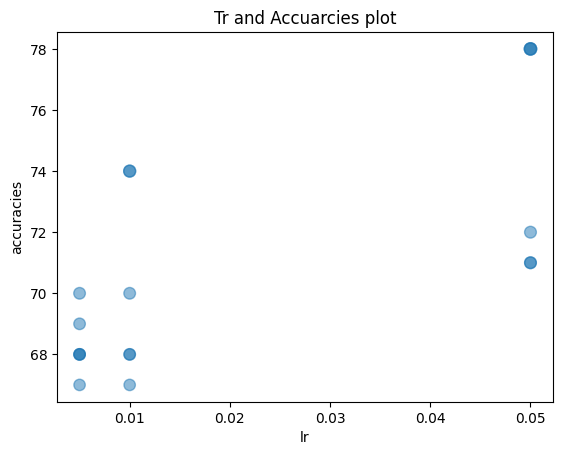

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter = ax.scatter(learning_rate, accuracies, s=accuracies, alpha=0.5)
ax.set_xlabel('lr')
ax.set_ylabel('accuracies')
ax.set_title('Tr and Accuarcies plot')

plt.show()

A. We don't need to train with all the dataset to get highest accuracy. We can also change the other hyperparameters like epochs or learning rate to get the same accuracy or even higher accuracy. The more the number of epochs the higher the probabilty that we will get higher accuracy.

B. The reason here is the learning rate and epochs. Here learning rate decides by how much the weights change when there is error in output prediction. Here since the learning rate is very low the modification of weight will also be low. Also, here the number of epochs is quite low so that there is less chance for the weights to move really close to the correct weights which can classify all the outputs correctly. So, it is important that the learning rate is not either too low or too high and also the number of epochs have to higher. In other words, we have to experiment with these parameters to find the best valaues for them.

C. Yes. By setting num_epochs=2500 and lr=0.15 we were able to achieve an accuracy of 81% as shown in the below code.

D. It might not always be worth it. But adjusting both epochs and learning rate is a good idea to get higher accuracy. But if the data is really large then it requires a lot of computation power.


    

In [10]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [100] # percent of the training dataset to train with
num_epochs = [2500]     # number of epochs
lr_array = [0.15]       # learning rate

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
          size =  round(len(instances_tr)*tr_size/100)
          pre_instances = instances_tr[0:size]
          weights = train_perceptron(pre_instances, lr, epochs)
          accuracy = get_accuracy(weights, instances_te)
        print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs: 2500, learning rate: 0.150; Accuracy (test, 100 instances): 81.0
